# YOLOv8 Training

This notebook trains a YOLOv8 model on the brain hemorrhage dataset.

In [1]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
# Assuming data.yaml is in ../datasets/brain_hemorrhage/data.yaml relative to this notebook
data_path = os.path.abspath(os.path.join('..', 'datasets', 'brain_hemorrhage', 'data.yaml'))

print(f"Training with data config: {data_path}")

results = model.train(data=data_path, epochs=10, imgsz=640, project='brain_hemorrhage_project', name='yolov8n_run')

Training with data config: c:\Users\mebub_9a7jdi8\Desktop\Brain Stroke BloodClot Detection\datasets\brain_hemorrhage\data.yaml
Ultralytics 8.3.232  Python-3.12.12 torch-2.9.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\mebub_9a7jdi8\Desktop\Brain Stroke BloodClot Detection\datasets\brain_hemorrhage\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=trai

In [2]:
# Validate the model
metrics = model.val()

Ultralytics 8.3.232  Python-3.12.12 torch-2.9.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 96.046.6 MB/s, size: 27.4 KB)
val: Scanning C:\Users\mebub_9a7jdi8\Desktop\Brain Stroke BloodClot Detection\datasets\brain_hemorrhage\labels\val.cache... 64 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 64/64 31.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.4s/it 9.6s3.7ss
                   all         64         86      0.711      0.372       0.46      0.214
Speed: 2.7ms preprocess, 123.4ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to C:\Users\mebub_9a7jdi8\Desktop\Brain Stroke BloodClot Detection\Jupyter Notebook\runs\detect\val


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

Using image: ..\datasets\brain_hemorrhage\images\val\071_25.jpg

image 1/1 c:\Users\mebub_9a7jdi8\Desktop\Brain Stroke BloodClot Detection\Jupyter Notebook\..\datasets\brain_hemorrhage\images\val\071_25.jpg: 640x640 1 hemorrhage, 108.1ms
Speed: 6.3ms preprocess, 108.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


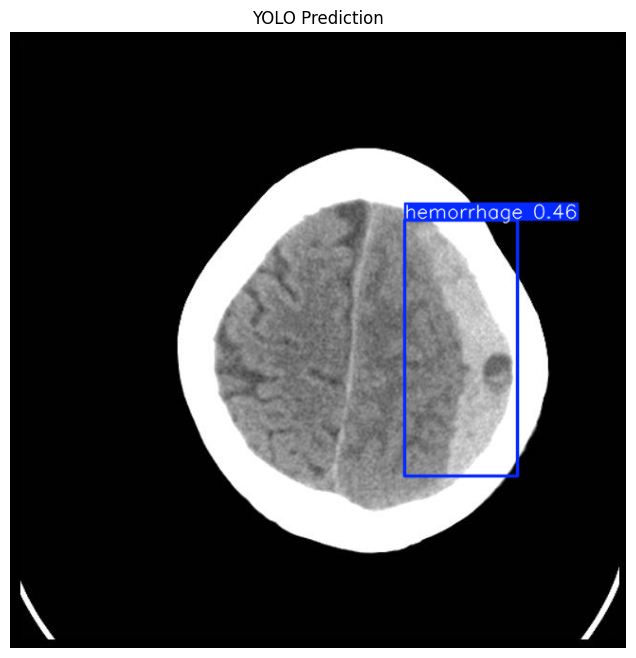

In [12]:
import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

# Pick a random validation image
val_images = glob.glob(os.path.join('..', 'datasets', 'brain_hemorrhage', 'images', 'val', '*.jpg'))

if val_images:
    sample_img = random.choice(val_images)
    print("Using image:", sample_img)

    results = model(sample_img)

    for r in results:
        im_array = r.plot()  # BGR numpy array with predictions
        
        # Convert BGR to RGB for correct display
        im_rgb = im_array[..., ::-1]

        # Display inside the Jupyter Notebook
        plt.figure(figsize=(8, 8))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title("YOLO Prediction")
        plt.show()


0: 640x640 1 hemorrhage, 163.3ms
1: 640x640 1 hemorrhage, 163.3ms
2: 640x640 (no detections), 163.3ms
3: 640x640 1 hemorrhage, 163.3ms
Speed: 6.6ms preprocess, 163.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


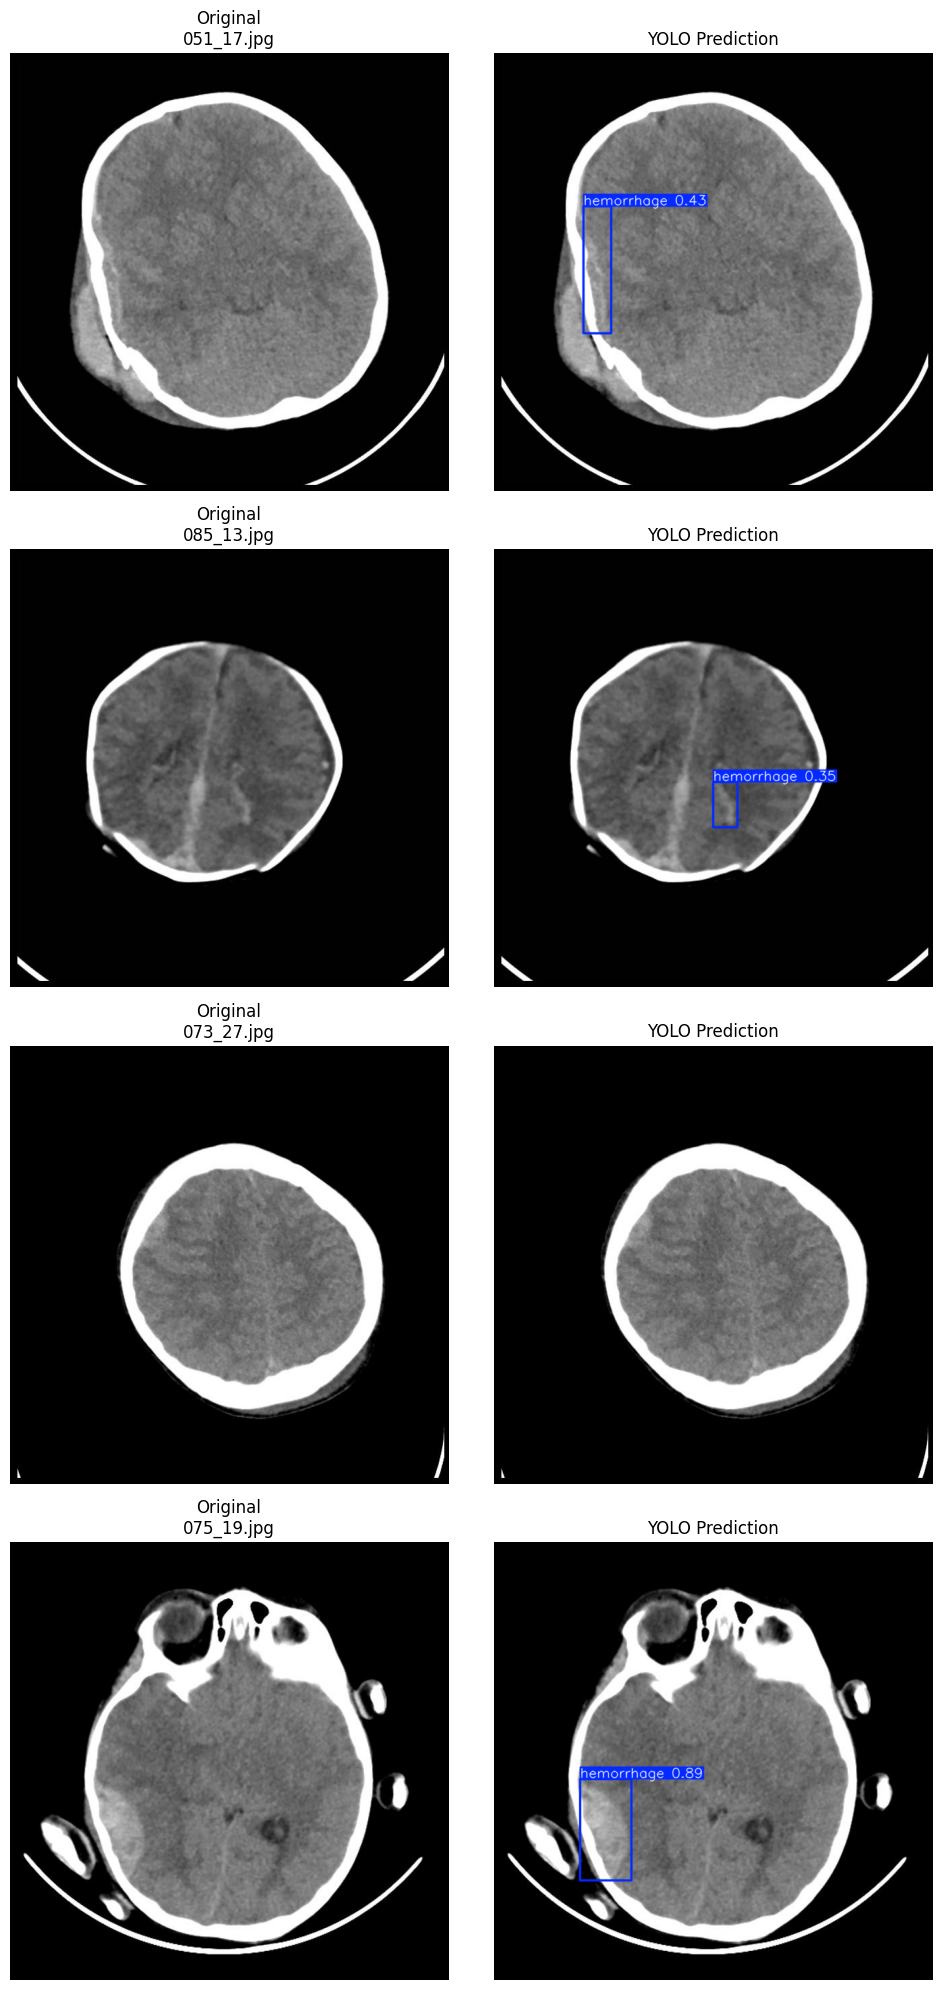

In [13]:
# Get validation images
val_images = glob.glob(os.path.join('..', 'datasets', 'brain_hemorrhage', 'images', 'val', '*.jpg'))

def show_samples_with_predictions(model, image_paths, num_samples=3):
    if not image_paths:
        print("No images found. Check your val_images path.")
        return
    
    # Limit number of samples to available images
    num_samples = min(num_samples, len(image_paths))
    
    # Pick random subset
    sample_paths = random.sample(image_paths, num_samples)
    
    # Run model on all selected images at once
    results = model(sample_paths)
    
    # Create a figure: each row = one image (original + prediction)
    plt.figure(figsize=(10, 5 * num_samples))
    
    for i, (img_path, r) in enumerate(zip(sample_paths, results)):
        # ---- Original image ----
        img = Image.open(img_path).convert("RGB")
        
        # ---- Predicted image ----
        pred_bgr = r.plot()              # BGR numpy array
        pred_rgb = pred_bgr[..., ::-1]   # convert to RGB
        
        # Left: original
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original\n{os.path.basename(img_path)}")
        
        # Right: prediction
        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(pred_rgb)
        plt.axis('off')
        plt.title("YOLO Prediction")
    
    plt.tight_layout()
    plt.show()

# 🔥 Call it
show_samples_with_predictions(model, val_images, num_samples=4)
